In [2]:
from gmft.pdf_bindings import PyPDFium2Document
from gmft import CroppedTable, TableDetector

detector = TableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc

In [3]:
# tables, doc = ingest_pdf("example_report.pdf")
tables, doc = ingest_pdf("/home/snexus/Downloads/Table_Example1.pdf")

In [4]:
type(tables[0])

gmft.table_detection.CroppedTable

In [5]:
len(doc)

17

In [6]:
type(doc)

gmft.pdf_bindings.bindings_pdfium.PyPDFium2Document

In [7]:
page = doc.get_page(5)
type(page)


gmft.pdf_bindings.bindings_pdfium.PyPDFium2Page

In [8]:
page.page_number

5

In [9]:
page_text = page.page.get_textpage()

In [10]:
print(page_text.get_text_range())

drying processes cost around $22.5 (Lu and El Hanandeh, 2017).
2.2.2.3. Woodchips pyrolysis. The LCIs of woodchips pyrolysis was
obtained from Demirbas and Balat (2007), Fan et al. (2011) and
Peters et al. (2015). The energy inputs and obtained yields varied
along with the changing temperatures. In this study, the required
energy input to reach the different temperatures was estimated
based on the wood enthalpy value according to Daugaard and
Brown (2003). The details of the energy requirement (i.e.
enthalpy) per function unit during woodchips pyrolysis at different
temperatures are calculated and presented in Table 3.
The capital cost for a medium size fast pyrolysis plant was
estimated using the following equation (1) which is suggested by
Bridgwater (2012) and Hayward et al. (2015):
KAUD million 2012 ¼ 2:302  f 0:67… (1)
Where,
K: capital cost of the pyrolysis plant
f: biomass annual input rate (Mg, dry)
The annual biomass input rate was estimated to be 30,000 Mg
(dry) according to

/home/snexus/projects/llm-search/.venv/lib64/python3.11/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


In [11]:
# p1 = doc.page
# help(p1.get_positions_and_text())

In [12]:
doc

In [13]:
# for table in tables:
#     table.visualize(figsize=None)

In [14]:
from gmft import AutoTableFormatter, TATRTableFormatter

formatter = TATRTableFormatter()

In [15]:
help(formatter.extract)

Help on method extract in module gmft.table_function:

extract(table: gmft.table_detection.CroppedTable, dpi=144, padding='auto', margin=None, config_overrides=None) -> gmft.table_function.FormattedTable method of gmft.table_function.TATRTableFormatter instance
    Extract the data from the table.



In [24]:
table_index = 2
table = tables[table_index]

In [25]:
table

In [35]:
table.captions()

['Table 1 Empirical yield functions from fast pyrolysis of hardwood.',
 'where, R2 : coefficient of determination; SE: Standard Error; SSE: the sum of squared errors of prediction; T: pyrolysis temperature.']

In [40]:
table

TypeError: Rect.is_intersecting() missing 1 required positional argument: 'other'

In [26]:
from gmft import AutoFormatConfig


config_hdr = AutoFormatConfig() # config may be passed like so
# config_hdr.verbosity = 3
# config_hdr.enable_multi_header = True
# config_hdr.semantic_spanning_cells = True # [Experimental] Merge headers
# config_hdr.large_table_threshold =0 
config_hdr.total_overlap_reject_threshold = 1.2

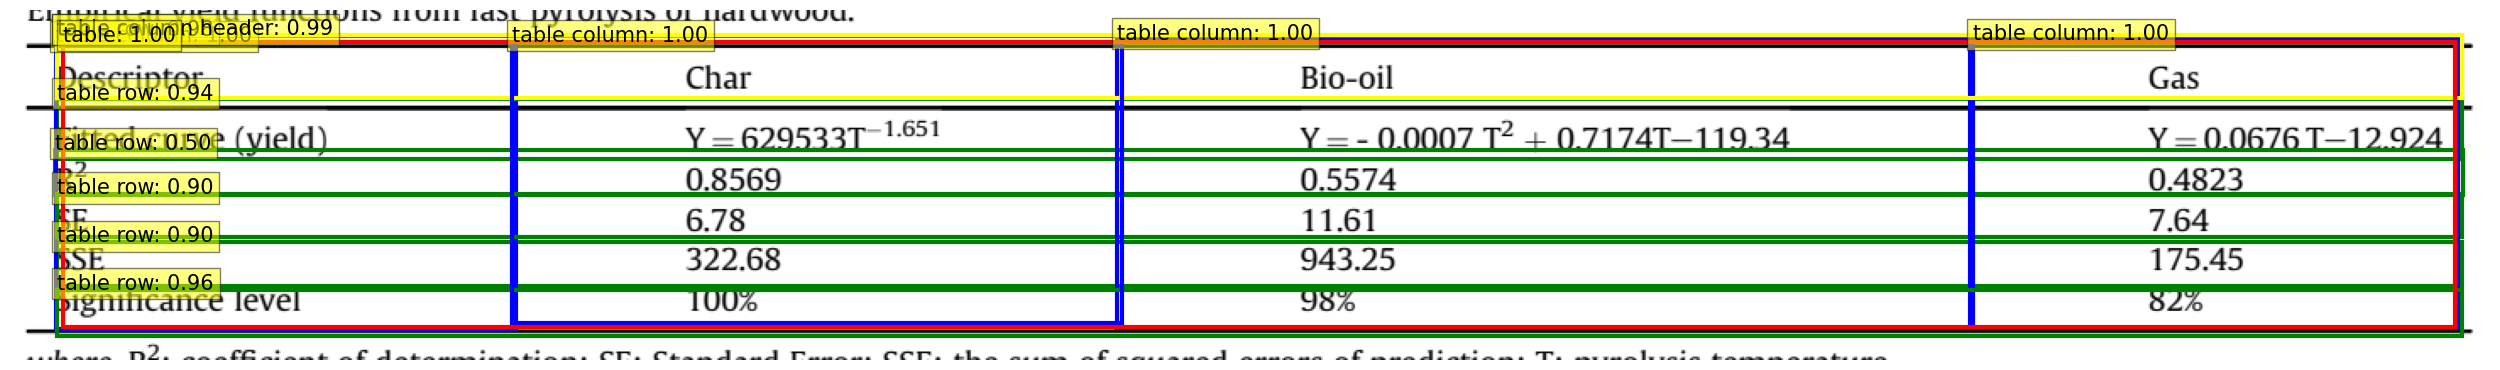

In [27]:

ft = formatter.extract(tables[table_index], dpi=200, config_overrides=config_hdr)
ft.visualize()

In [28]:
ft = formatter.extract(tables[table_index], config_overrides=config_hdr)

In [29]:
# ft.to_dict()

In [30]:
ft.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Descriptor  5 non-null      object
 1   Char        5 non-null      object
 2   Bio-oil     5 non-null      object
 3   Gas         5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [31]:
df = ft.df()

In [32]:
import re
df.columns =  [re.sub(r"\W+","", col)+str(i) for i, col in enumerate(df.columns) ]

In [33]:
df

,Descriptor0,Char1,Biooil2,Gas3
0,Fitted curve (yield),Y ¼ 629533T1.651,Y ¼ - 0.0007 T2 þ 0.7174Te119.34,Y ¼ 0.0676 Te12.924
1,R2,0.8569,0.5574,0.4823
2,SE,6.78,11.61,7.64
3,SSE,322.68,943.25,175.45
4,Significance level,100%,98%,82%


In [36]:
ft.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   m1      5 non-null      object
 2   m2      5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [46]:
df.to_records()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>m1</th>\n      <th>m2</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Shop fits for new and existing stores</td>\n      <td>1.3</td>\n      <td>1.3</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Production equipment and tooling</td>\n      <td>9.3</td>\n      <td>10.1</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Computer equipment and software</td>\n      <td>2.1</td>\n      <td>2.9</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Site</td>\n      <td>1.9</td>\n      <td>3.4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Total capital additions</td>\n      <td>14.6</td>\n      <td>17.7</td>\n    </tr>\n  </tbody>\n</table>'

In [47]:
def func(row):
    xml = ['<item>']
    for field in row.index:
        xml.append('  <field name="{0}">{1}</field>'.format(field, row[field]))
    xml.append('</item>')
    return '\n'.join(xml)

In [49]:
df.apply(func, axis=1)

0    <item>\n  <field name="0">Shop fits for new an...
1    <item>\n  <field name="0">Production equipment...
2    <item>\n  <field name="0">Computer equipment a...
3    <item>\n  <field name="0">Site</field>\n  <fie...
4    <item>\n  <field name="0">Total capital additi...
dtype: object

In [48]:
print('\n'.join(df.apply(func, axis=1)))

<item>
  <field name="0">Shop fits for new and existing stores</field>
  <field name="m1">1.3</field>
  <field name="m2">1.3</field>
</item>
<item>
  <field name="0">Production equipment and tooling</field>
  <field name="m1">9.3</field>
  <field name="m2">10.1</field>
</item>
<item>
  <field name="0">Computer equipment and software</field>
  <field name="m1">2.1</field>
  <field name="m2">2.9</field>
</item>
<item>
  <field name="0">Site</field>
  <field name="m1">1.9</field>
  <field name="m2">3.4</field>
</item>
<item>
  <field name="0">Total capital additions</field>
  <field name="m1">14.6</field>
  <field name="m2">17.7</field>
</item>


In [22]:
ft.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0                                                 5 non-null      object
 1   Number of stores at 29 May 2022               6 non-null      object
 2   Opened                                        6 non-null      object
 3   Closed                                        6 non-null      object
 4   Number of stores at 28 May 2023               6 non-null      object
 5   Number of single staff stores at 28 May 2023  6 non-null      object
 6   Number of single staff stores at 29 May 2022  6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes
